In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pesticide-prediction/Fertilizer Prediction (1).csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
df=pd.read_csv("/kaggle/input/pesticide-prediction/Fertilizer Prediction (1).csv")

In [5]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [6]:
df.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [8]:
df.describe

<bound method NDFrame.describe of     Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  \
0            26         52        38     Sandy      Maize        37   
1            29         52        45     Loamy  Sugarcane        12   
2            34         65        62     Black     Cotton         7   
3            32         62        34       Red    Tobacco        22   
4            28         54        46    Clayey      Paddy        35   
..          ...        ...       ...       ...        ...       ...   
94           25         50        32    Clayey     Pulses        24   
95           30         60        27       Red    Tobacco         4   
96           38         72        51     Loamy      Wheat        39   
97           36         60        43     Sandy    Millets        15   
98           29         58        57     Black  Sugarcane        12   

    Potassium  Phosphorous Fertilizer Name  
0           0            0            Urea  
1           0          

In [9]:
df.isnull().any()

Temparature        False
Humidity           False
Moisture           False
Soil Type          False
Crop Type          False
Nitrogen           False
Potassium          False
Phosphorous        False
Fertilizer Name    False
dtype: bool

In [10]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [11]:
df["Fertilizer Name"].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [12]:
le=LabelEncoder()
df["Soil Type"]=le.fit_transform(df["Soil Type"])

In [13]:
print("Soil type mappings:")
for index, soil in enumerate(le.classes_):
    print(f"{soil} : {index}")

Soil type mappings:
Black : 0
Clayey : 1
Loamy : 2
Red : 3
Sandy : 4


In [14]:
df["Crop Type"]=le.fit_transform(df["Crop Type"])

In [15]:
print("Crop mappings:")
for index, crop in enumerate(le.classes_):
    print(f"{crop} : {index}")

Crop mappings:
Barley : 0
Cotton : 1
Ground Nuts : 2
Maize : 3
Millets : 4
Oil seeds : 5
Paddy : 6
Pulses : 7
Sugarcane : 8
Tobacco : 9
Wheat : 10


In [16]:
df["Fertilizer Name"]=le.fit_transform(df["Fertilizer Name"])

In [17]:
print("Fertilizer mappings:")
for index, fertilizer in enumerate(le.classes_):
    print(f"{fertilizer} : {index}")

Fertilizer mappings:
10-26-26 : 0
14-35-14 : 1
17-17-17 : 2
20-20 : 3
28-28 : 4
DAP : 5
Urea : 6


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Temparature      99 non-null     int64
 1   Humidity         99 non-null     int64
 2   Moisture         99 non-null     int64
 3   Soil Type        99 non-null     int64
 4   Crop Type        99 non-null     int64
 5   Nitrogen         99 non-null     int64
 6   Potassium        99 non-null     int64
 7   Phosphorous      99 non-null     int64
 8   Fertilizer Name  99 non-null     int64
dtypes: int64(9)
memory usage: 7.1 KB


In [18]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


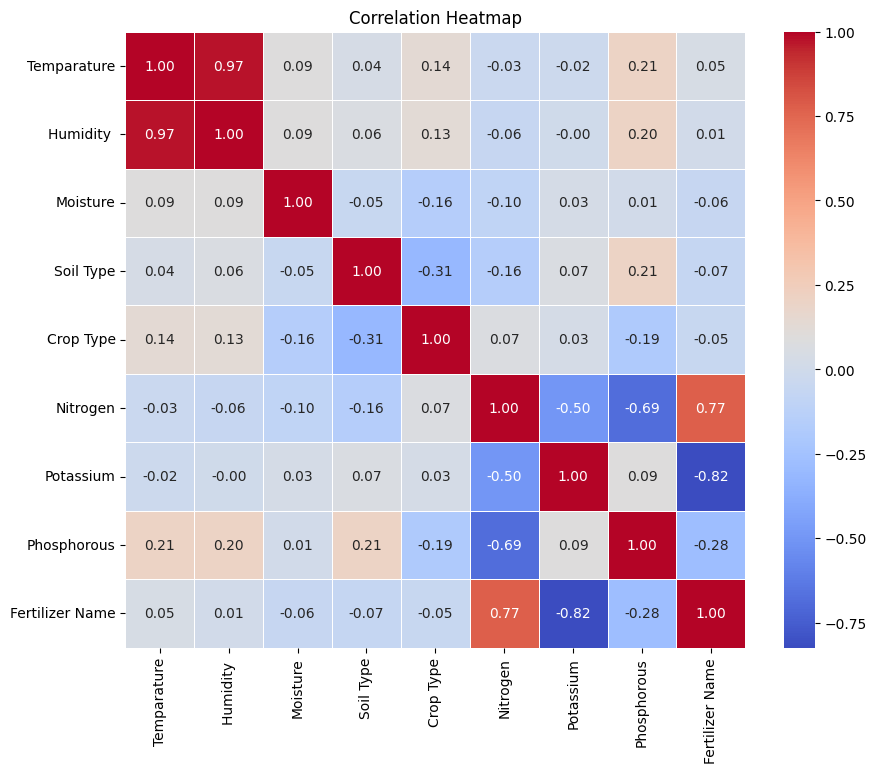

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
x=df.drop(columns=["Fertilizer Name"])
y=df.iloc[:,8:9]

In [21]:
x.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,4,3,37,0,0
1,29,52,45,2,8,12,0,36
2,34,65,62,0,1,7,9,30
3,32,62,34,3,9,22,0,20
4,28,54,46,1,6,35,0,0


In [22]:
y.head()

,Fertilizer Name
0,6
1,5
2,1
3,4
4,6


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((79, 8), (20, 8), (79, 1), (20, 1))

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

In [27]:
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [28]:
y_pred1 = xgb_model.predict(x_test)

In [30]:
accuracy_score(y_test,y_pred1)

0.95

In [31]:
confusion_matrix(y_test,y_pred1)

array([[2, 1, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 4]])

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
y_pred_tree = tree_model.predict(x_test)
y_pred_tree

array([1, 0, 1, 4, 2, 6, 6, 6, 2, 4, 5, 0, 2, 4, 6, 4, 5, 3, 1, 4])

In [34]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)

Decision Tree Accuracy: 0.9


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [39]:
random_forest_model.fit(x_train, y_train)

/tmp/ipykernel_325/3498481547.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [40]:
y_pred = random_forest_model.predict(x_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [42]:
accuracy

1.0

In [2]:
import pickle 

In [45]:
pickle.dump(random_forest_model, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))